In [1]:
#Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [3]:
#improrting dataset

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 50.5MB/s]


In [5]:
import zipfile   #unzipping dataset
zip_ref=zipfile.ZipFile('/content/crop-recommendation-dataset.zip','r')
zip_ref.extractall('/content/')
zip_ref.close()

In [6]:
data=pd.read_csv('/content/Crop_recommendation.csv')

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data.shape

(2200, 8)

In [9]:
data.dtypes     #type of data for each column

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [10]:
data.value_counts('label')

,count
label,
apple,100
banana,100
rice,100
pomegranate,100
pigeonpeas,100
papaya,100
orange,100
muskmelon,100
mungbean,100


In [11]:
len(data['label'].unique())  #number of labels

22

In [12]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
#seperating into X and Y sets

X=data.drop('label',axis=1)
Y=data['label']

In [14]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
Y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [16]:
#Applying OneHot encoding on Y

#for 'koi_tce_delivname' column
ohe=OneHotEncoder(sparse_output=False, drop='first') # sparse=False for pandas DataFrame output
# Reshape the Series into a DataFrame with a single column named 'label'
ab=ohe.fit_transform(Y.values.reshape(-1, 1))
ab=pd.DataFrame(ab,columns=ohe.get_feature_names_out(['label'])) # Get feature names for columns

In [17]:
ab.head(20)

,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,label_lentil,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
ab.isnull().sum()   #checking for null values

,0
label_banana,0
label_blackgram,0
label_chickpea,0
label_coconut,0
label_coffee,0
label_cotton,0
label_grapes,0
label_jute,0
label_kidneybeans,0
label_lentil,0


In [19]:
X.isnull().sum()  #checking for null values

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0


**-----------------------Training data------------------------**

In [20]:
X.shape,ab.shape    #getting the shape of both X & ab

((2200, 7), (2200, 21))

In [21]:
#Doing train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [22]:
print("X_train",X_train.shape,"---------","X_test",X_test.shape)
print("Y_train",Y_train.shape,"---------","Y_test",Y_test.shape)

X_train (1540, 7) --------- X_test (660, 7)
Y_train (1540,) --------- Y_test (660,)


**:Training and testing using support vector machine algo (SVM)**

In [23]:
#-------Using SVM algo-------------

#using GridSearchCV to find the best parameters and best score
clf=GridSearchCV(SVC(gamma='auto'),{'C':[5,10,15,30,35,50],'kernel':['rbf','linear','poly','sigmoid'
                                  ]}, cv=10, return_train_score=False)
clf.fit(X_train,Y_train)
clf.best_score_, clf.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


(0.9831168831168832, {'C': 50, 'kernel': 'linear'})

In [24]:
pd.DataFrame(clf.cv_results_).iloc[:,[6,17,19]]

,params,mean_test_score,rank_test_score
0,"{'C': 5, 'kernel': 'rbf'}",0.159740,13
1,"{'C': 5, 'kernel': 'linear'}",0.981169,9
2,"{'C': 5, 'kernel': 'poly'}",0.982468,2
3,"{'C': 5, 'kernel': 'sigmoid'}",0.050649,19
4,"{'C': 10, 'kernel': 'rbf'}",0.159740,13
5,"{'C': 10, 'kernel': 'linear'}",0.981169,9
6,"{'C': 10, 'kernel': 'poly'}",0.982468,2
7,"{'C': 10, 'kernel': 'sigmoid'}",0.050649,19
8,"{'C': 15, 'kernel': 'rbf'}",0.159740,13
9,"{'C': 15, 'kernel': 'linear'}",0.981169,9


In [25]:
#predicting the output and testing

svm=SVC(C=50,kernel='linear')
svm.fit(X_train,Y_train)

Y_pred_svm=svm.predict(X_test)

accuracy_score(Y_test,Y_pred_svm)*100   #checking the accuracy score

99.24242424242425

**Training and testing using Logistic Regression:**

In [26]:
#--------Using Logistic Regression

#using GridSearchCV to find the best parameters and best score
clfl=GridSearchCV(LogisticRegression(max_iter=10),{'C':[1,2,4,5,100,200,300,500,800,1000]},cv=10,return_train_score=False)
clfl.fit(X_train,Y_train)

clfl.best_score_, clfl.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(0.8558441558441559, {'C': 1})

In [27]:
lr=LogisticRegression(C=1)
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)

accuracy_score(Y_test,Y_pred_lr)*100  #accuracy score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


96.06060606060606

**Testing and training using randomforestclassifier**

In [28]:
#----------------using RandomForestClassifier----------------------------

#using GridSearchCV to find the best parameters
clfr=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100,200],
                    'criterion':['gini','entropy']},cv=5,return_train_score=False)
clfr.fit(X_train,Y_train)

clfr.best_score_, clfr.best_params_

(0.996103896103896, {'criterion': 'entropy', 'n_estimators': 100})

In [29]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=200)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)
accuracy_score(Y_test,Y_pred_rf)*100   #accuracy score

99.54545454545455

**Testing and training using Naive Bayes Classifier**

In [30]:
#-------using naive bayes classifier------------

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
cross_val_score(gnb,X_test,Y_test,cv=10).mean()   #cross validation score


0.9969696969696968

In [31]:
gnb.fit(X_train,Y_train)
Y_pred_gnb=gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_gnb)*100   #accuracy score

99.54545454545455

**Comparing accuracy of all models**

In [32]:
#using accuracy score
models = [svm,lr,rf,gnb ]
models_name = ['SVM','Logistic Regression','Random Forest','Naive Bayes']

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models_name[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Accuracy : ',accuracy_score(Y_train, train_preds)*100)

    val_pred = models[i].predict(X_test)
    print('Validation Accuracy : ',accuracy_score(Y_test, val_pred)*100)
    print()

SVM : 
Training Accuracy :  99.28571428571429
Validation Accuracy :  99.24242424242425



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 
Training Accuracy :  97.14285714285714
Validation Accuracy :  96.06060606060606

Random Forest : 
Training Accuracy :  100.0
Validation Accuracy :  99.54545454545455

Naive Bayes : 
Training Accuracy :  99.48051948051948
Validation Accuracy :  99.54545454545455



In [33]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [34]:

print(classification_report(Y_test,Y_pred_gnb,target_names=data['label'].unique())) #Classification report

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        35
 kidneybeans       1.00      1.00      1.00        30
  pigeonpeas       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        37
    mungbean       1.00      1.00      1.00        36
   blackgram       1.00      1.00      1.00        23
      lentil       0.96      0.92      0.94        26
 pomegranate       1.00      1.00      1.00        33
      banana       1.00      1.00      1.00        42
       mango       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [35]:
models = [svm,lr,rf,gnb ]
models_name = ['SVM','Logistic Regression','Random Forest','Naive Bayes']
for i in range(len(models)):
  print(models_name[i],": ",cross_val_score(models[i],X_test,Y_test,cv=10).mean())
  print()


SVM :  0.9803030303030305



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression :  0.9484848484848485

Random Forest :  0.9893939393939395

Naive Bayes :  0.9969696969696968



SVM : 


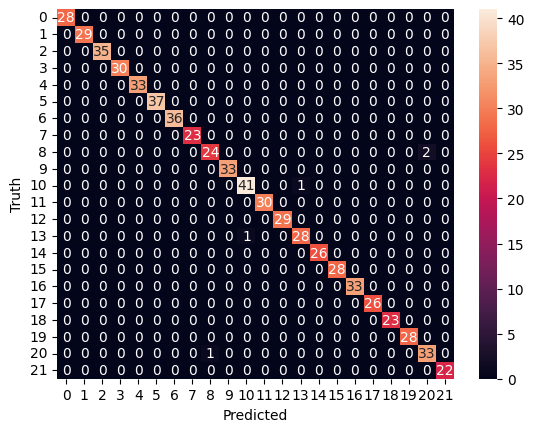

Logistic Regression : 


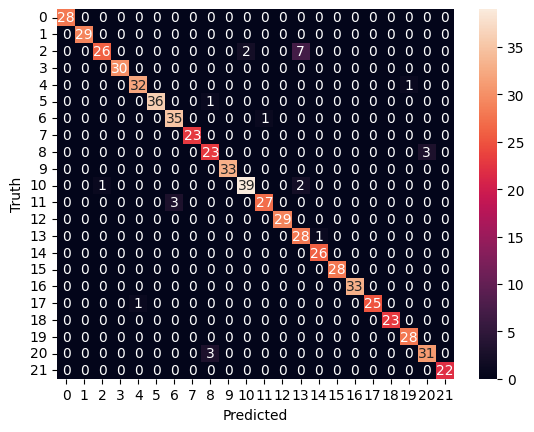

Random Forest : 


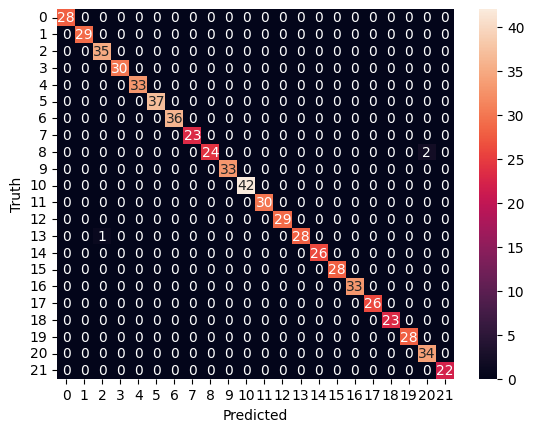

Naive Bayes : 


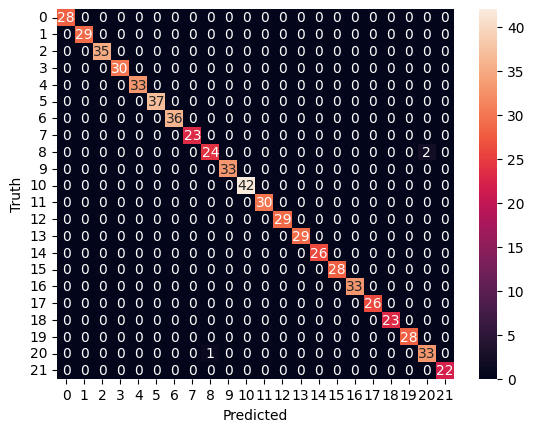

In [36]:
#Plotting confusion matrix for each algo:

for i in range(len(models)):
    print(f'{models_name[i]} : ')
    Y_pred=models[i].predict(X_test)
    cm=confusion_matrix(Y_test,Y_pred)
    sns.heatmap(cm,annot=True)

    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Therefore from the above we can say that **Naive Bayes Classifier** has best results where training accuracy is **99.48 and validation accuracy is **99.54%**

In [37]:
#Predicting using foreign data

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = gnb.predict(data)
print(prediction)

['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [38]:
import joblib   #importing joblib fr export and import of model


In [41]:
#exporting model

joblib.dump(gnb, 'Naive_bayes_crp.pkl')

['Naive_bayes_crp.pkl']

In [40]:
#for loading the model
loaded_model = joblib.load('Naive_bayes.pkl')